# Working with ARCH Derivatives: networks

In this notebook we'll do some network analyses of the files we got from the COVID19 IIPC collection. It is based on the [original code from Nick Ruest and the Archive Unleashed team](https://github.com/archivesunleashed/notebooks).

We will use domain-graph.csv and nt web-graph.csv (never managed to download fully the second one).

## Environment setup

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Domain Graph

These derivative files provide network graph data for analysis, and offer an opportunity to explore the way websites link to each other. We'll work with two of the graph data files:

- Domain Graph
- Image Graph

We will work mainly with Domain Graph (smaller file >>> easier to do :))

In [10]:
# Let's load domain-grap
domain_graph = pd.read_csv("data/domain-graph.csv")
domain_graph

,crawl_date,source,target,count
0,20200606,moph.gov.lb,moph.gov.lb,2180467
1,20210201,moph.gov.lb,moph.gov.lb,2140771
2,20201225,inumeraveis.com.br,inumeraveis.com.br,1880103
3,20200607,moph.gov.lb,moph.gov.lb,1876804
4,20200224,ecdc.europa.eu,ecdc.europa.eu,1839273
...,...,...,...,...
2283987,20200409,harfordcountyhealth.com,npr.org,6
2283988,20200328,pressherald.com,homes.pressherald.com,6
2283989,20200408,clarin.com,facebook.com,6
2283990,20200314,newsroom.arlingtonva.us,departments.arlingtonva.us,6


Let's create a first network with networkx

In [62]:
# If you look closely at the file, you'll see that there are many loops. Probably websites' pages linking to other pages from the same website. Let's remove those selfloops.

domain_graph_noself = domain_graph[domain_graph.source != domain_graph.target]
domain_graph_noself

# That removes a lot of line. 

,crawl_date,source,target,count
284,20210703,screenshots.covidtracking.com,covidtracking.com,200573
299,20210413,covid19research.ssrc.org,ssrc.org,189450
308,20210217,secure.jbs.elsevierhealth.com,thelancet.com,185542
327,20210131,govtrack.us,twitter.com,177975
331,20210218,secure.jbs.elsevierhealth.com,thelancet.com,177033
...,...,...,...,...
2283987,20200409,harfordcountyhealth.com,npr.org,6
2283988,20200328,pressherald.com,homes.pressherald.com,6
2283989,20200408,clarin.com,facebook.com,6
2283990,20200314,newsroom.arlingtonva.us,departments.arlingtonva.us,6


In [81]:
# Well, this was already sorted, but in case... let's now select only the first lines
domain_graph_topn = domain_graph_noself.loc[domain_graph_noself['count'] >= 10000]
domain_graph_topn

,crawl_date,source,target,count
284,20210703,screenshots.covidtracking.com,covidtracking.com,200573
299,20210413,covid19research.ssrc.org,ssrc.org,189450
308,20210217,secure.jbs.elsevierhealth.com,thelancet.com,185542
327,20210131,govtrack.us,twitter.com,177975
331,20210218,secure.jbs.elsevierhealth.com,thelancet.com,177033
...,...,...,...,...
5565,20201117,corona-transition.org,linkedin.com,10072
5566,20210703,corona.gov.bd,muktopaath.gov.bd,10072
5572,20200728,g1.globo.com,globoesporte.globo.com,10056
5586,20200509,g1.globo.com,globoesporte.globo.com,10017


In [82]:
G = nx.from_pandas_edgelist(
    domain_graph_topn, source="source", target="target", edge_key="target", edge_attr="count"
)
G.remove_edges_from(nx.selfloop_edges(G))

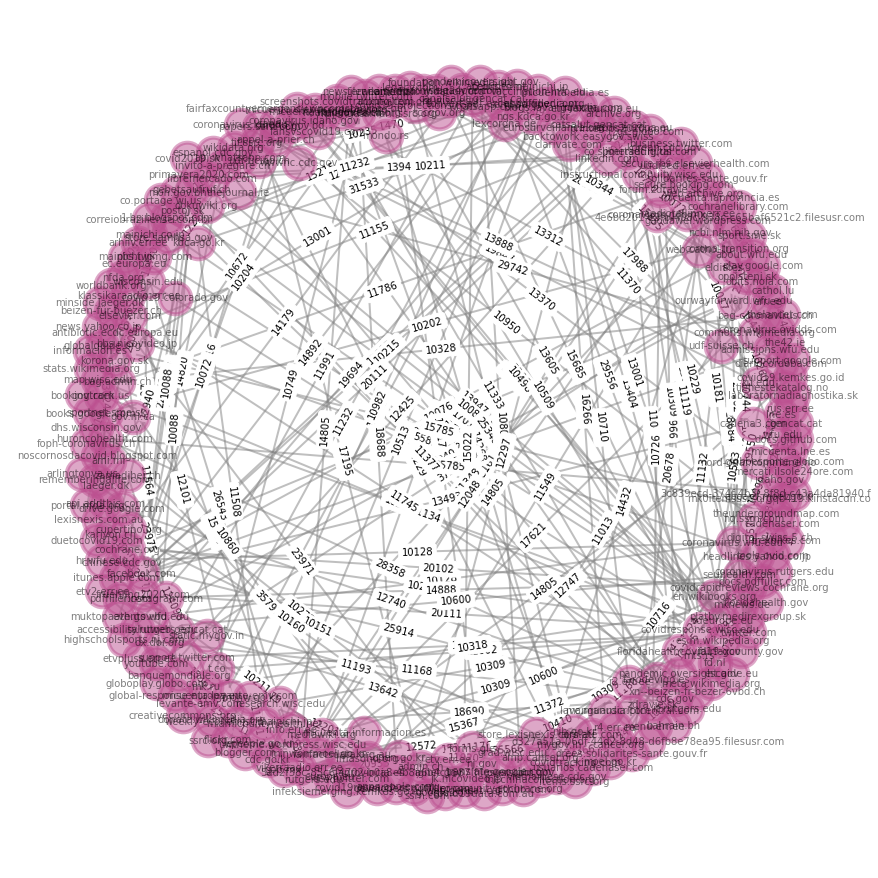

In [84]:
# We are using here the spring layout see:

pos = nx.spring_layout(G, k=15)
options = {
    "node_size": 1000,
    "node_color": "#bc5090",
    "node_shape": "o",
    "alpha": 0.5,
    "linewidths": 4,
    "font_size": 10,
    "font_color": "black",
    "width": 2,
    "edge_color": "grey",
}

plt.figure(figsize=(12, 12))

nx.draw(G, pos, with_labels=True, **options)

labels = {e: G.edges[e]["count"] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

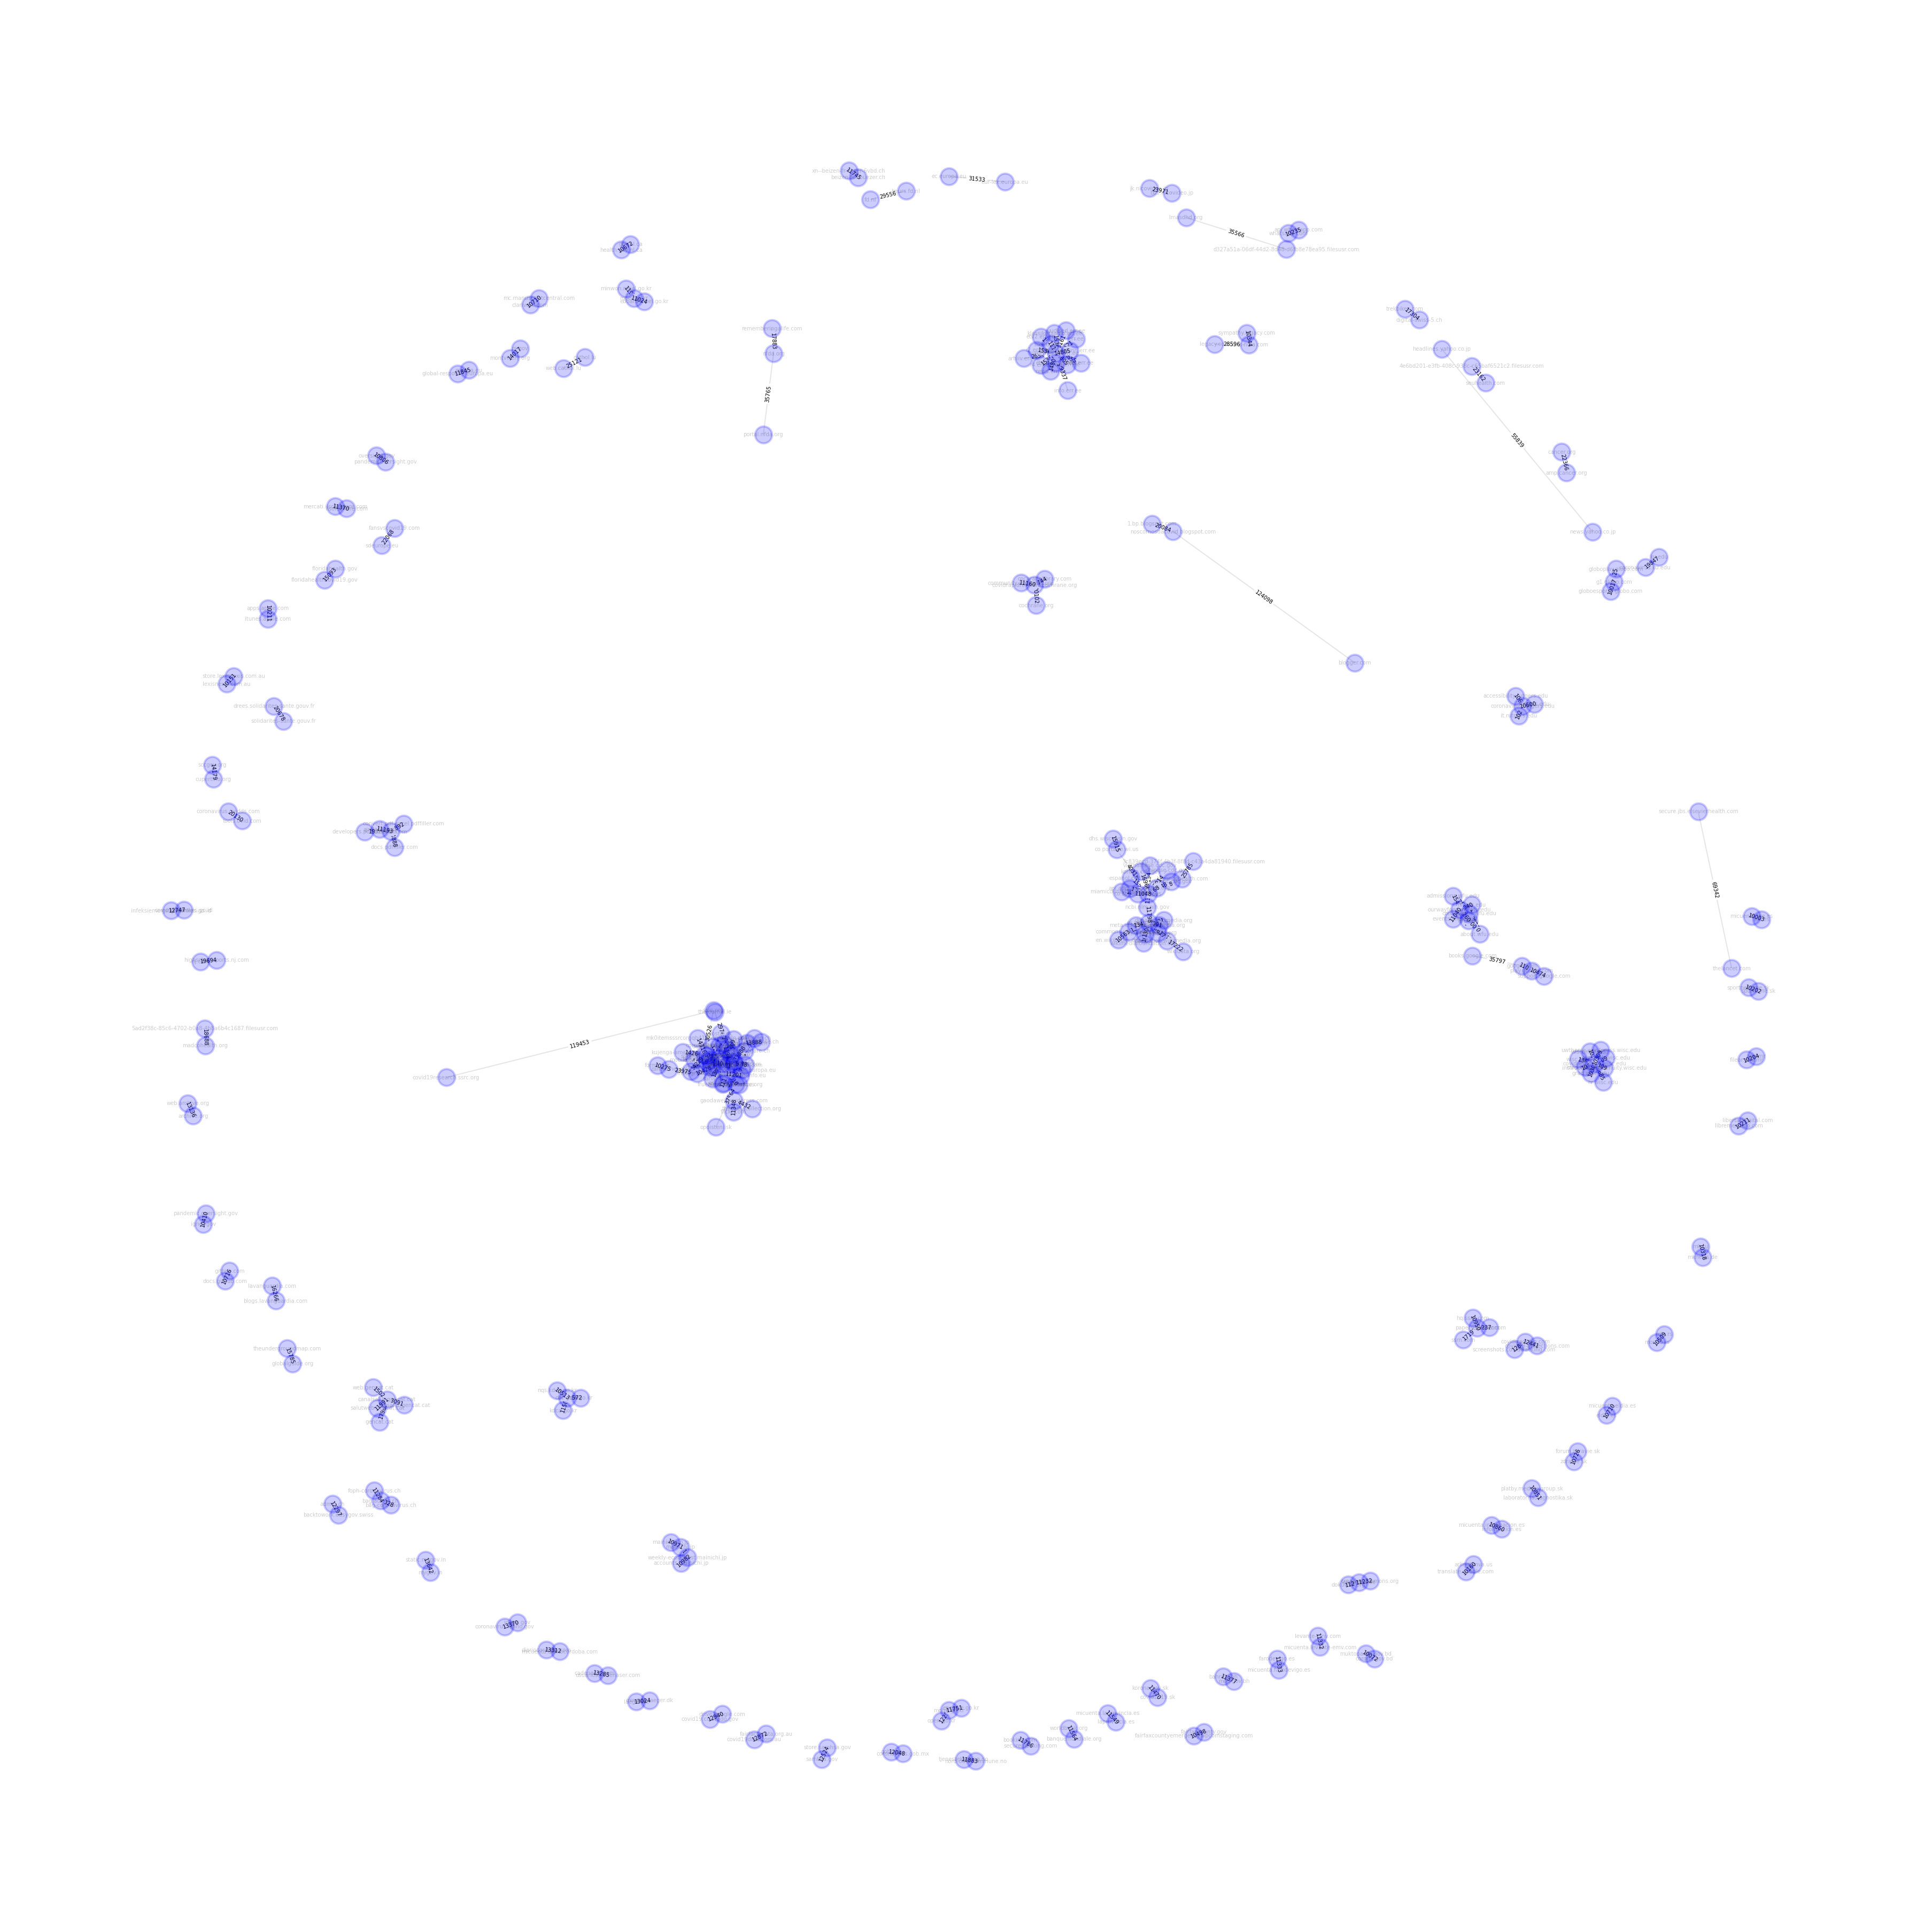

In [87]:
# same but with kamada_kawai_layout

pos = nx.kamada_kawai_layout(G, dist=None, pos=None, weight='count', scale=2, center=None, dim=2)
options = {
    "node_size": 1000,
    "node_color": 'blue',
    "node_shape": "o",
    "alpha": 0.2,
    "linewidths": 4,
    "font_size": 10,
    "font_color": "black",
    "width": 2,
    "edge_color": "grey",
}

plt.figure(figsize=(50, 50))

nx.draw(G, pos, with_labels=True, **options)

labels = {e: G.edges[e]["count"] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()